In [1]:
# House Prices - Advanced Regression Techniques
# Predict sales prices and practice feature engineering, RFs, and gradient boosting

import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
data=pd.read_csv("house-prices-advanced-regression-techniques\\train.csv")

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data.shape

(1460, 81)

In [5]:
pd.options.display.max_rows 
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.drop(["Id","Alley","GarageYrBlt","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)



In [8]:
data["LotFrontage"]=data["LotFrontage"].fillna(data["LotFrontage"].mean())


In [9]:
data["GarageQual"]=data["GarageQual"].fillna(data["GarageQual"].mode()[0])
data["FireplaceQu"]=data["FireplaceQu"].fillna(data["FireplaceQu"].mode()[0])
data["GarageType"]=data["GarageType"].fillna(data["GarageType"].mode()[0])
data["GarageFinish"]=data["GarageFinish"].fillna(data["GarageFinish"].mode()[0])
data["GarageCond"]=data["GarageCond"].fillna(data["GarageCond"].mode()[0])
data["BsmtCond"]=data["BsmtCond"].fillna(data["BsmtCond"].mode()[0])
data["BsmtQual"]=data["BsmtQual"].fillna(data["BsmtQual"].mode()[0])
data["BsmtExposure"]=data["BsmtExposure"].fillna(data["BsmtExposure"].mode()[0])
data["BsmtFinType2"]=data["BsmtFinType2"].fillna(data["BsmtFinType2"].mode()[0])
data["BsmtFinType1"]=data["BsmtFinType1"].fillna(data["BsmtFinType1"].mode()[0])
data["BsmtQual"]=data["BsmtQual"].fillna(data["BsmtQual"].mode()[0])
data["MasVnrType"]=data["MasVnrType"].fillna(data["MasVnrType"].mode()[0])
data["MasVnrArea"]=data["MasVnrArea"].fillna(data["MasVnrArea"].mode()[0])
data["Electrical"]=data["Electrical"].fillna(data["Electrical"].mode()[0])


In [10]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

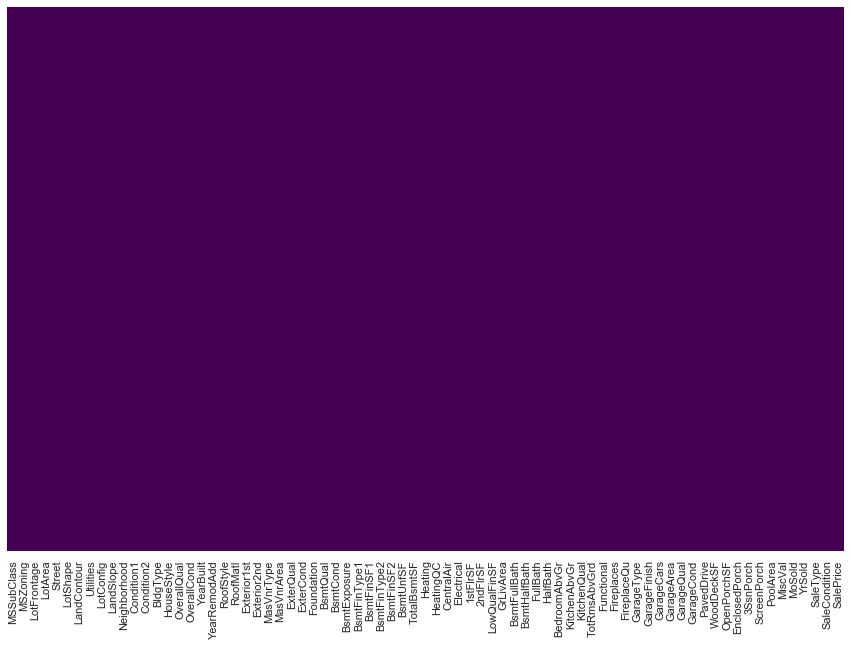

In [11]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [12]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [14]:
data.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:

columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

len(columns)

39

In [38]:
test=pd.read_csv("house-prices-advanced-regression-techniques\\test.csv")

In [39]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [41]:
test.drop(["Id","Alley","GarageYrBlt","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)


test["LotFrontage"]=test["LotFrontage"].fillna(test["LotFrontage"].mean())

test["BsmtFinType1"]=test["BsmtFinType1"].fillna(test["BsmtFinType1"].mode()[0])
test["GarageArea"]=test["GarageArea"].fillna(test["GarageArea"].mean())
test["GarageCars"]=test["GarageCars"].fillna(test["GarageCars"].mean())
test["BsmtFinSF1"]=test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mean())
test["MSZoning"]=test["MSZoning"].fillna(test["MSZoning"].mode()[0])
test["Utilities"]=test["Utilities"].fillna(test["Utilities"].mode()[0])
test["BsmtFinType2"]=test["BsmtFinType2"].fillna(test["BsmtFinType2"].mode()[0])

test["BsmtFinSF2"]=test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mean())
test["BsmtUnfSF"]=test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mean())
test["TotalBsmtSF"]=test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean())





test["Functional"]=test["Functional"].fillna(test["Functional"].mode()[0])
test["KitchenQual"]=test["KitchenQual"].fillna(test["KitchenQual"].mode()[0])
test["BsmtHalfBath"]=test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].mode()[0])
test["BsmtFullBath"]=test["BsmtFullBath"].fillna(test["BsmtFullBath"].mode()[0])
test["Exterior1st"]=test["Exterior1st"].fillna(test["Exterior1st"].mode()[0])
test["Exterior2nd"]=test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0])
test["SaleType"]=test["SaleType"].fillna(test["SaleType"].mode()[0])
test["GarageQual"]=test["GarageQual"].fillna(test["GarageQual"].mode()[0])
test["GarageQual"]=test["GarageQual"].fillna(test["GarageQual"].mode()[0])
test["FireplaceQu"]=test["FireplaceQu"].fillna(test["FireplaceQu"].mode()[0])
test["GarageType"]=test["GarageType"].fillna(test["GarageType"].mode()[0])
test["GarageFinish"]=test["GarageFinish"].fillna(test["GarageFinish"].mode()[0])
test["GarageCond"]=test["GarageCond"].fillna(test["GarageCond"].mode()[0])
test["BsmtCond"]=test["BsmtCond"].fillna(test["BsmtCond"].mode()[0])
test["BsmtQual"]=test["BsmtQual"].fillna(test["BsmtQual"].mode()[0])
test["BsmtExposure"]=test["BsmtExposure"].fillna(test["BsmtExposure"].mode()[0])

test["BsmtQual"]=test["BsmtQual"].fillna(test["BsmtQual"].mode()[0])
test["MasVnrType"]=test["MasVnrType"].fillna(test["MasVnrType"].mode()[0])
test["MasVnrArea"]=test["MasVnrArea"].fillna(test["MasVnrArea"].mode()[0])
test["Electrical"]=test["Electrical"].fillna(test["Electrical"].mode()[0])




test.shape

(1459, 74)

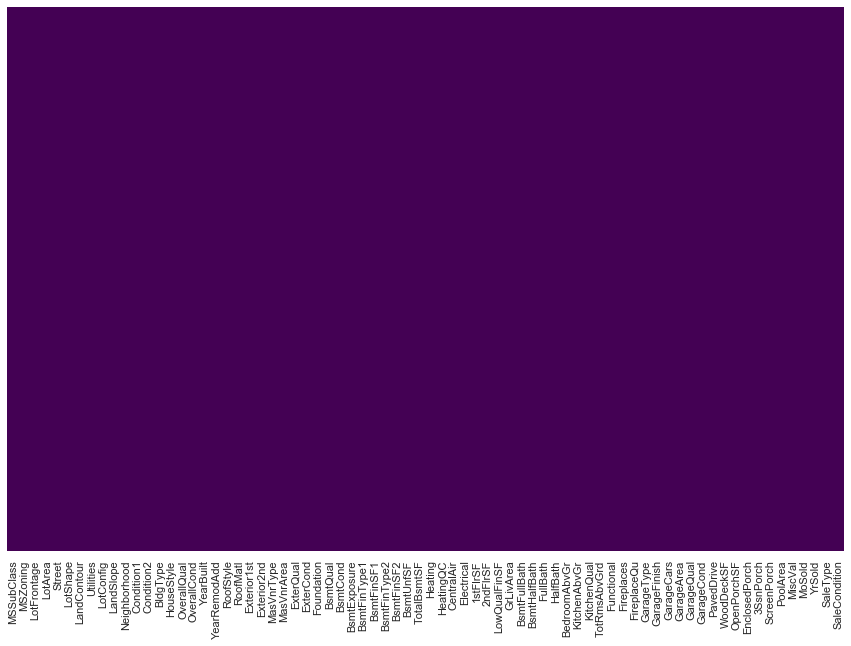

In [42]:

            
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [43]:


combined= pd.concat([data,test],axis=0)



In [44]:
combined.shape

(2919, 75)

In [45]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [46]:
newcomb= pd.get_dummies(combined, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],drop_first=True)

In [47]:
newcomb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 236 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(200)
memory usage: 1.4 MB


In [48]:
newcomb["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [49]:
combined

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [50]:
train=newcomb.iloc[:1460,:]
test=newcomb.iloc[1460:,:]

In [51]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
test.drop(["SalePrice"],axis=1,inplace=True)

C:\Users\ADITYA\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
test.shape

(1459, 235)

In [54]:
x_train= train.drop(["SalePrice"],axis=1)
y_train=train.SalePrice

In [55]:
from sklearn.model_selection import train_test_split

# X_test.drop(["SalePrice"],axis=1,inplace=True)

In [56]:
##Librabries for building model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [57]:
##Define model
# model=linear_model.LinearRegression()
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(x_train,y_train)
# Building the Linear Reg. model
# model.fit(x_train,y_train)

Y_pred=classifier.predict(test)

In [58]:
Y_pred.shape

(1459,)

In [59]:
Ypredi=pd.DataFrame(Y_pred)
sub=pd.read_csv("house-prices-advanced-regression-techniques\\sample_submission.csv")
datasets=pd.concat([sub["Id"],Ypredi],axis=1)
datasets.columns=["Id","SalePrice"]
datasets.to_csv("sample_submission.csv",index=False)